In [129]:
# A Convolutional Networ implementation example using TensorFlow library.
# This example is using the MNIST database of handwritten digits
# (http://yann.lecun.com/exdb/mnist/)

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [130]:
# # Import MINST data
# import input_data
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [131]:
import tensorflow as tf

In [132]:
%%time
# @aman - the below code used as a replacement of above(not working/commented code)
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# working
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Wall time: 1.32 s


In [133]:
# @aman -
print(mnist)
print(mnist.train.images)
print(mnist.test.num_examples)


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000020215481EB8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000020215481FD0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000202153B6E48>)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
10000


(784,)


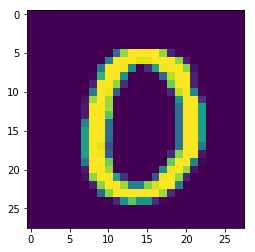

In [134]:
# @aman -

import matplotlib.pyplot as plt
%matplotlib inline
print(mnist.train.images[0].shape)

tmp = mnist.train.images[10].reshape((28,28))

plt.imshow(tmp)

In [135]:
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 20

In [136]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

In [137]:
# tf Graph input

# @aman - tf old version
# x = tf.placeholder(tf.types.float32, [None, n_input])
# y = tf.placeholder(tf.types.float32, [None, n_classes])
# keep_prob = tf.placeholder(tf.types.float32) #dropout (keep probability)

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [138]:
# Create model
def conv2d(img, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def max_pool(img, k):
    return tf.nn.max_pool(img, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = max_pool(conv1, k=2)
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, _dropout)

    # Convolution Layer
    conv2 = conv2d(conv1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = max_pool(conv2, k=2)
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, _dropout)

    # Fully connected layer
    # Reshape conv2 output to fit dense layer input
    dense1 = tf.reshape(conv2, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.add(tf.matmul(dense1, _weights['wd1']), _biases['bd1']))
    # Apply Dropout
    dense1 = tf.nn.dropout(dense1, _dropout) # Apply Dropout

    # Output, class prediction
    out = tf.add(tf.matmul(dense1, _weights['out']), _biases['out'])
    return out

In [139]:
weights['wd1'].get_shape()

TensorShape([Dimension(3136), Dimension(1024)])

In [140]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])), 
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), 
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), 
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes])) 
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [141]:
%%time
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

Wall time: 252 ms


In [142]:
# Define loss and optimizer
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= pred, labels= y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [143]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

# @aman - old versoin
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.types.float32))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [144]:
# Initializing the variables
init = tf.initialize_all_variables()

In [145]:
%%time
loss_list = []
iter_list = []
accuracy_list = []

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc) )

            accuracy_list.append(acc)
            loss_list.append(loss)
            iter_list.append(str(step*batch_size))
            
        step += 1
    print("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], 
                                                             y: mnist.test.labels[:256], 
                                                             keep_prob: 1.}) )

Iter 2560, Minibatch Loss= 18210.218750, Training Accuracy= 0.39062
Iter 5120, Minibatch Loss= 7699.315918, Training Accuracy= 0.58594
Iter 7680, Minibatch Loss= 7162.924316, Training Accuracy= 0.67969
Iter 10240, Minibatch Loss= 6240.480957, Training Accuracy= 0.71875
Iter 12800, Minibatch Loss= 4498.306641, Training Accuracy= 0.78906
Iter 15360, Minibatch Loss= 3865.179443, Training Accuracy= 0.81250
Iter 17920, Minibatch Loss= 2745.434570, Training Accuracy= 0.83594
Iter 20480, Minibatch Loss= 3407.853027, Training Accuracy= 0.85156
Iter 23040, Minibatch Loss= 2145.144043, Training Accuracy= 0.85938
Iter 25600, Minibatch Loss= 1991.177490, Training Accuracy= 0.89844
Iter 28160, Minibatch Loss= 2320.489746, Training Accuracy= 0.85938
Iter 30720, Minibatch Loss= 2446.942383, Training Accuracy= 0.81250
Iter 33280, Minibatch Loss= 2723.604004, Training Accuracy= 0.85156
Iter 35840, Minibatch Loss= 2423.077637, Training Accuracy= 0.84375
Iter 38400, Minibatch Loss= 2508.249268, Training 

In [146]:
import numpy as np
iter_list = [ int(x) for x in iter_list]
loss_list = [ float(x) for x in loss_list]
accuracy_list = [ float(x) for x in accuracy_list]

#np.sum(np.array(iter_list))
np.sum(iter_list)

#np.sum

1996800

In [147]:
len(iter_list)

39

In [148]:
# # window = 5
# # start = i/window * window

# process_list = [iter_list, loss_list, accuracy_list]

# for ls in range()
# iter_list = [ iter_list[i]/ np.sum(iter_list[i/window * window : (i + window)/window ]) for i in range(len(iter_list))]

In [149]:
iter_list
loss_list

[18210.21875,
 7699.31591796875,
 7162.92431640625,
 6240.48095703125,
 4498.306640625,
 3865.179443359375,
 2745.4345703125,
 3407.85302734375,
 2145.14404296875,
 1991.177490234375,
 2320.48974609375,
 2446.9423828125,
 2723.60400390625,
 2423.07763671875,
 2508.249267578125,
 973.5787353515625,
 2491.183349609375,
 1350.873046875,
 2245.32470703125,
 1543.7930908203125,
 446.9866638183594,
 1334.7266845703125,
 1331.34912109375,
 1408.4691162109375,
 1034.93212890625,
 683.6109008789062,
 1234.6104736328125,
 988.608154296875,
 478.7372131347656,
 923.3409423828125,
 901.2648315429688,
 329.06787109375,
 680.8917236328125,
 625.6675415039062,
 586.3675537109375,
 912.5902099609375,
 336.1811828613281,
 619.643310546875,
 339.1383056640625]

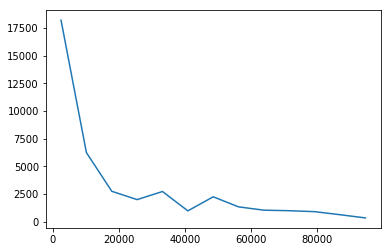

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(iter_list[::3], loss_list[::3])
plt.show()

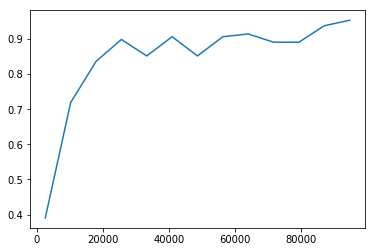

In [151]:
plt.plot(iter_list[::3], accuracy_list[::3])
plt.show()

In [152]:
%%time
writer = tf.summary.FileWriter("summary_logs_convnet", sess.graph)

Wall time: 5.23 s
